<a href="https://colab.research.google.com/github/gustavopacifico26/previsao_precos_casas/blob/main/previsao_precos_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse trabalho irá explorar o banco de dados "fetch_california_housing", que se encontra na biblioteca sklearn.datasets, e através de seus dados, irá premedir o preço de uma casa baseado nas informações do bairro.

Para isso, serão aplicadas diferentes técnicas de machine learning a fim de compara-las para determinar qual melhor se encaixa no nosso banco de dados


#Bibliotecas utilizadas na aplicação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from imblearn.over_sampling import SMOTE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import TomekLinks


from  sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

#Leitura dos Dados

Carregando a base de dados

In [2]:
california_data = fetch_california_housing()
X = california_data.data
y = california_data.target

df = pd.DataFrame(X, columns=california_data.feature_names)
df['Preço'] = y

A seguir, vamos observar todas as colunas que compõem o nosso dataset

In [3]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Preço'],
      dtype='object')

Para facilitar a compreensão de cada uma dessas colunas, vamos renomear elas

In [4]:
df.rename(columns={'MedInc': 'mediana_renda', 
                   'HouseAge': 'idade_casa', 
                   'AveRooms': 'media_comodo', 
                   'AveBedrms': 'media_quartos_dormir',
                   'Population': 'pessoas_bairro',
                   'AveOccup': 'media_pessoas_habitação'}, inplace=True)

Agora, iremos exibir os primeiros itens do nosso dataset para entender as informações presentes em cada uma das colunas

In [5]:
df.head()

mediana_renda  idade_casa  media_comodo  media_quartos_dormir  \
0         8.3252        41.0      6.984127              1.023810   
1         8.3014        21.0      6.238137              0.971880   
2         7.2574        52.0      8.288136              1.073446   
3         5.6431        52.0      5.817352              1.073059   
4         3.8462        52.0      6.281853              1.081081   

   pessoas_bairro  media_pessoas_habitação  Latitude  Longitude  Preço  
0           322.0                 2.555556     37.88    -122.23  4.526  
1          2401.0                 2.109842     37.86    -122.22  3.585  
2           496.0                 2.802260     37.85    -122.24  3.521  
3           558.0                 2.547945     37.85    -122.25  3.413  
4           565.0                 2.181467     37.85    -122.25  3.422

Agora, vamos ver uma descrição de cada uma das colunas do dataset

In [6]:
df.describe().T 

count         mean          std         min  \
mediana_renda            20640.0     3.870671     1.899822    0.499900   
idade_casa               20640.0    28.639486    12.585558    1.000000   
media_comodo             20640.0     5.429000     2.474173    0.846154   
media_quartos_dormir     20640.0     1.096675     0.473911    0.333333   
pessoas_bairro           20640.0  1425.476744  1132.462122    3.000000   
media_pessoas_habitação  20640.0     3.070655    10.386050    0.692308   
Latitude                 20640.0    35.631861     2.135952   32.540000   
Longitude                20640.0  -119.569704     2.003532 -124.350000   
Preço                    20640.0     2.068558     1.153956    0.149990   

                                25%          50%          75%           max  
mediana_renda              2.563400     3.534800     4.743250     15.000100  
idade_casa                18.000000    29.000000    37.000000     52.000000  
media_comodo               4.440716     5.229129     6.052381    141.909091  
media_quartos_dormir       1.006079     1.048780     1.099526     34.066667  
pessoas_bairro           787.000000  1166.000000  1725.000000  35682.000000  
media_pessoas_habitação    2.429741     2.818116     3.282261   1243.333333  
Latitude                  33.930000    34.260000    37.710000     41.950000  
Longitude               -121.800000  -118.490000  -118.010000   -114.310000  
Preço                      1.196000     1.797000     2.647250      5.000010

Foi possível observar, portanto, que não há dados faltantes, além de outras informações 

##Tratamento dos Dados

Iremos primeiro analisar quais colunas possuem dados descrepantes no dataset

##HEATMAP

<Axes: >

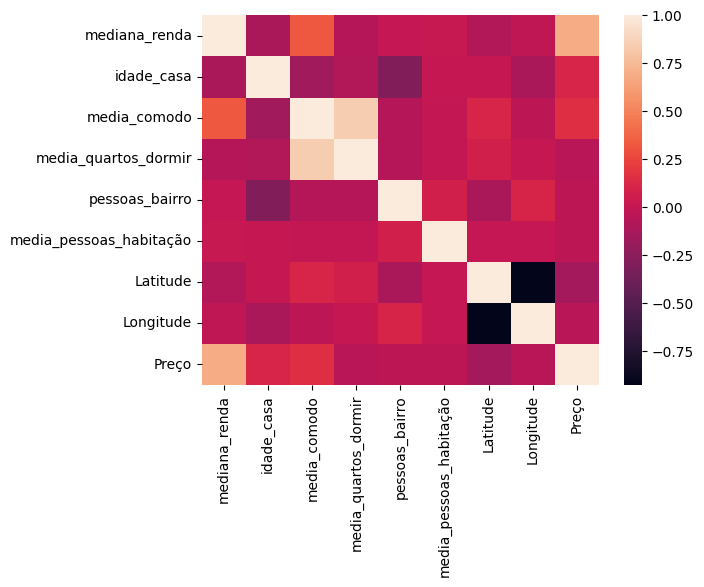

In [7]:
sns.heatmap(df.corr(),annot=False)

In [8]:
#df = df.drop(['Latitude','Longitude'], axis = 1)

##Gráfico de Dispersão

In [9]:
grafico = px.scatter_matrix(df, dimensions=['mediana_renda', 'idade_casa', 'media_comodo','media_quartos_dormir'])
grafico.show()

In [10]:
grafico = px.scatter_matrix(df, dimensions=['pessoas_bairro', 'media_pessoas_habitação', 'Latitude', 'Longitude'])
grafico.show()

##Tirando as maiores dispersões

In [11]:
df =df.loc[(df['media_comodo'] < 30) & (df['media_quartos_dormir'] <14) & (df['pessoas_bairro'] <= 8000) & (df['media_pessoas_habitação']< 10)]

Nova descrição do dataset

In [12]:
df.describe().T

count         mean         std         min  \
mediana_renda            20520.0     3.868736    1.897802    0.499900   
idade_casa               20520.0    28.703558   12.552566    1.000000   
media_comodo             20520.0     5.373142    1.670606    0.846154   
media_quartos_dormir     20520.0     1.085293    0.263334    0.333333   
pessoas_bairro           20520.0  1397.426267  978.417610    3.000000   
media_pessoas_habitação  20520.0     2.918103    0.764536    0.692308   
Latitude                 20520.0    35.629689    2.135279   32.540000   
Longitude                20520.0  -119.571019    2.004082 -124.350000   
Preço                    20520.0     2.069157    1.154427    0.149990   

                                25%          50%          75%          max  
mediana_renda              2.562500     3.532450     4.740400    15.000100  
idade_casa                18.000000    29.000000    37.000000    52.000000  
media_comodo               4.438356     5.225511     6.045093    29.852941  
media_quartos_dormir       1.005894     1.048599     1.099091     6.500000  
pessoas_bairro           787.000000  1165.000000  1718.000000  7985.000000  
media_pessoas_habitação    2.428869     2.817259     3.278954     9.954545  
Latitude                  33.930000    34.250000    37.710000    41.950000  
Longitude               -121.800000  -118.490000  -118.010000  -114.310000  
Preço                      1.195000     1.798000     2.649000     5.000010

#Escalonamento do dataset

Inicialmente, definimos as variáveis independentes (X) e a variável dependente (y)

In [13]:
X = df.drop('Preço', axis=1)
y = df['Preço']

Depois, fazemos a normalização dos dados

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Aplicação dos Modelos de Machine Learning

Em seguida, dividimos o conjunto de dados em conjuntos de treinamento e teste

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

##Regressão Múltipla

Para aplicar regessão múltipla no nosso dataset, iremos criar um modelo de regressão linear e treiná-lo usando os dados de treinamento e fazer as previsões

In [16]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

Agora iremos avaliar o modelo com os métodos de avaliação MSE e R2

In [17]:
mse1 = mean_squared_error(y_test, y_pred)
r21 = regressor.score(X_test, y_test)

##KNN

Agora para aplicar a técnica de machine learning KNN, iremos passar como atributo "n_neighbors", que define o número de vizinhos mais próximos a serem considerados pelo algoritmo

In [18]:
knn = KNeighborsRegressor(n_neighbors=4)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse2 = mean_squared_error(y_test, y_pred)
r22 = knn.score(X_test, y_test)

##Árvore de Regressão

Como atributos definimos a profundidade máxima da árvore e a forma de geração de números aleatórios para a criação da árvore

In [19]:
tree = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=10, random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

mse3 = mean_squared_error(y_test, y_pred)
r23 = tree.score(X_test, y_test)

##Floresta Randômica

Para aplicar o modelo de Floresta Randômica, definimos as seguintes variáveis


*   o número de árvores de decisão independentes na floresta.
*   a profundidade máxima permitida para cada árvore.
*   o número mínimo de amostras necessárias em cada folha de uma árvore.
*   o número mínimo de amostras necessárias para dividir um nó interno de uma árvore em dois ramos.

In [20]:
rfc = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_leaf=2, min_samples_split=2, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

mse4 = mean_squared_error(y_test, y_pred)
r24 = rfc.score(X_test, y_test)

## SVM - Support Vector Machine

Depois dessa etapa, já é possível definir fazer o treinamento do modelo

In [21]:
svr_linear = SVR(kernel='linear', C=1.0)
svr_linear.fit(X_train, y_train)

SVR(kernel='linear')

Por fim, fazemos a previsão e avaliação do modelo

In [22]:
y_pred = svr_linear.predict(X_test)
mse5 = mean_squared_error(y_test, y_pred)
r25 = r2_score(y_test, y_pred)

## Rede Neural

Criamos e treinamos uma rede neural com camadas ocultas

In [23]:
mlp = MLPRegressor(hidden_layer_sizes=(100,50), max_iter=1000)
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)

In [24]:
y_pred = mlp.predict(X_test)
mse6 = mean_squared_error(y_test, y_pred)
r26 = r2_score(y_test, y_pred)

#Comparação dos Resultados

Agora iremos analisar os modelos entre si para verificar qual o melhor se encaixa na nossa aplicação

In [25]:
modelos = ["Regressão Múltipla", "KNN", "Árvore de Regressão", "Floresta Randômica", "SVM", "Rede Neural"]
mse = [mse1, mse2, mse3, mse4, mse5, mse6]
r2 = [r21, r22, r23, r24, r25, r26]

tabela = list()

for i in range(len(modelos)):
  tabela.append([modelos[i],mse[i], r2[i]])

tabela = pd.DataFrame(tabela, columns = ["Modelos", "MSE", "R2"])

print(tabela)

               Modelos       MSE        R2
0   Regressão Múltipla  0.450123  0.655349
1                  KNN  0.378788  0.709969
2  Árvore de Regressão  0.372506  0.714778
3   Floresta Randômica  0.243423  0.813615
4                  SVM  0.462923  0.645548
5          Rede Neural  0.268599  0.794339
